In [ ]:
Hãy dự báo điểm thi đánh giá năng lực phần NGONNGU
Dựa trên điển T5 và T6 sử dụng mô hình hồi quy tuyến tính
NGONNGU = f(T5,T6) = A0 + A1*T5 + A2*T6 + epsilon
Với các thiết lập training chiếm 80% và random state = 16
Pipeline: Input -> Model -> Output
    
    
Nhắc lại: Các bước xây dựng mô hình trong Machine Learning
    
Bước 1: Xác định bài toán
Bước 2: Xác định Input Output
Bước 3: Xác định mô hình sử dụng
Bước 4: Chia tập dữ liệu ra làm 2 phần
        Traninng và Testing theo tỉ lệ 80% va f20% 
Bước 5: Huấn luyện mô hình rên tập Traning
Bước 6: Đánh giá mô hình:
        - Trên tập training
        - Trên tập test

In [1]:
#Import Thu Vien
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#Tai Du Lieu Len Data Frame, dat ten la df
df = pd.read_csv('dulieuxettuyendaihoc.csv',header = 0, delimiter = ',', encoding = 'utf-8')
df.head()

df=df[['T5','T6','NGONNGU']]

#Tập dữ liệu Input(đặc trưng) và Output(mục tiêu)
X = df[['T5','T6']].values #input
y = df[['NGONNGU']].values #output

#Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)
#Chia tách ra trainning ( huấn luyện ) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16 )

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

steps = [('modelLR',LinearRegression())]

In [3]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('modelLR', LinearRegression())])

In [4]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('modelLR', LinearRegression())])

In [5]:
# Đánh giá mô hình
import numpy as np
from sklearn import metrics

#Tinh gia tri du bao T6 dua tren du lieu T5 cua tap Test
y_test_pred = pipe.predict(X_test)

print('Score or R-Squared:',pipe.score(X_test,y_test))

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_test_pred))

print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_pred))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(y_test,y_test_pred))


Score or R-Squared: -0.07691460875153755
Mean Absolute Error: 1.1905472933346881
Mean Squared Error: 1.987412256869439
Root Mean Squared Error: 1.4097560983622093
Mean Absolute Percentage Error: 0.38123864099681043


In [11]:
# Đánh giá mô hình
import numpy as np
from sklearn import metrics

#Tinh gia tri du bao T6 dua tren du lieu T5 cua tap Test
y_train_pred = pipe.predict(X_train)

print('Score or R-Squared:',pipe.score(X_train,y_train))

print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_train_pred))

print('Mean Squared Error:',metrics.mean_squared_error(y_train,y_train_pred))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(y_train,y_train_pred))


Score or R-Squared: 0.01846517069125686
Mean Absolute Error: 1.1471162639928523
Mean Squared Error: 2.008686106397567
Root Mean Squared Error: 1.4172812375804482
Mean Absolute Percentage Error: 0.3941285255756852


In [ ]:
Comment: 
- T5,T6 không giải thíhc cho NN

In [ ]:
Cách 2: Dùng Scatter giữa Actual và Predict
- Nếu mô hình tốt thì những điểm màu xanh sẽ nằm gần hoặc đề lên đường màu đỏ thì càng tốt

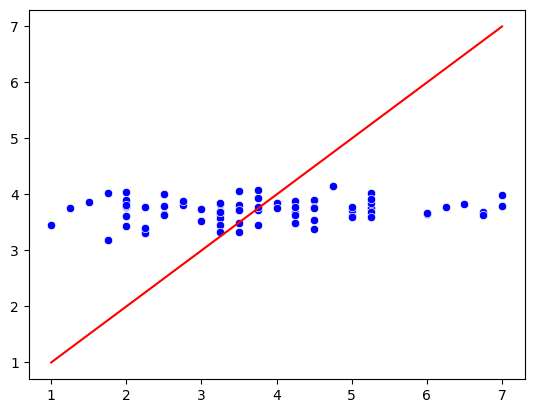

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),
                markers='o',color='b')
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),
                markers='s',color='r')
plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(), markers='o', color='b')

sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), markers='s', color='r')
plt.show()

ValueError: All arrays must be of the same length

In [17]:
from sklearn.linear_model import LinearRegression

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Fit mô hình với dữ liệu huấn luyện
model.fit(X_train, y_train)

# Dự đoán giá trị trên tập huấn luyện
y_train_pred = model.predict(X_train)

# Tiếp tục với các bước khác của bạn
dfTrainValidation = pd.DataFrame(list(zip(X_train[:, 0], X_train[:, 1],
                                          y_train.flatten(),
                                          y_train_pred.flatten())),
                                 columns=['T5_train', 'T6_train', 'y_train', 'y_train_predicted'])
dfTrainValidation['Residual'] = dfTrainValidation['y_train'] - dfTrainValidation['y_train_predicted']


In [18]:
dfTrainValidation

,T5_train,T6_train,y_train,y_train_predicted,Residual
0,5.5,5.7,5.25,3.763403,1.486597
1,8.5,7.8,1.50,3.861832,-2.361832
2,8.9,8.5,6.25,3.777539,2.472461
3,4.9,6.5,1.00,3.460742,-2.460742
4,8.0,7.2,4.50,3.903414,0.596586
...,...,...,...,...,...
75,6.3,8.0,4.50,3.386064,1.113936
76,8.4,8.1,3.75,3.772731,-0.022731
77,5.0,5.1,2.00,3.804985,-1.804985
78,3.5,5.6,2.25,3.396253,-1.146253


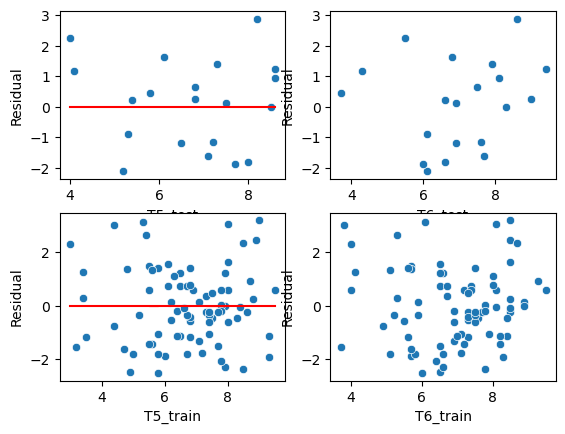

In [31]:
fig,axes = plt.subplots(2,2)

sns.scatterplot(data=dfTrainValidation,x='T5_train',y='Residual',ax = axes[1,0])
sns.lineplot(data=dfTrainValidation,x='T5_train', y=[0]*len(dfTrainValidation),color='r',ax = axes[1,0])

sns.scatterplot(data=dfTrainValidation,x='T6_train',y='Residual',ax=axes[1,1])

sns.scatterplot(data=dfTestValidation, x='T5_test', y='Residual', ax=axes[0,0])
sns.lineplot(data=dfTestValidation, x='T5_test', y=[0] * len(dfTestValidation), color='r', ax=axes[0,0])

sns.scatterplot(data=dfTestValidation, x='T6_test', y='Residual', ax=axes[0,1])

plt.show()

In [ ]:
Cách 4 dùng  histogram  plot

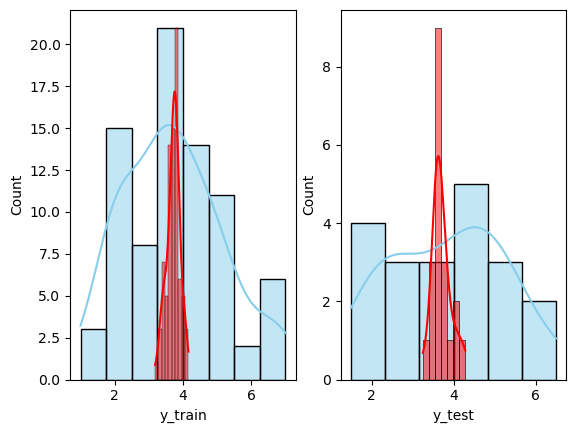

In [29]:
fig, axes = plt.subplots(1,2)

sns.histplot(data= dfTrainValidation,x='y_train',color='skyblue',label='Actual',kde=True,ax = axes[0])

sns.histplot(data= dfTrainValidation,x='y_train_predicted',color='red',label='Forecast',kde=True,ax = axes[0])

sns.histplot(data= dfTestValidation,x='y_test',color='skyblue',label='Actual',kde=True,ax = axes[1])

sns.histplot(data= dfTestValidation,x='y_test_predicted',color='red',label='Forecast',kde=True,ax = axes[1])


plt.show()

In [ ]:
Fitting, Overfitting  vaf Underfitting trong mô hình học máy

giá trị Bias: lỗi của một mô hình (Bias càng cao thì mô hình xấu, và ngược lại)
    Tốt tiêu cực: 
    Tốt tích cực: học những cái cốt lỗi từ đó có thể suy luận ra cái mới 
    -> variance cao là học tiêu cực, variance thấp học tích cực
-> nếu mô hình xấu là Underfitting 
-> nếu bias thấp mà variance quá cao là Overfitting
-> học tích cực và đủ khả năng suy diễn là Fitting

Tìm hiểu cách lấy giá trị bias